In [104]:
%matplotlib inline
import learners
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import utils

wine_data = scipy.io.loadmat("data.mat")
X = wine_data['X']
y = wine_data['y'].ravel()
X_test = wine_data['X_test']

# Whiten the data.
whiten = learners.Whiten()
whiten.fit(X)
X_white = whiten.transform(X)
X_test_white = whiten.transform(X_test)

# Split the data into a training set and validation set.
num_train = X.shape[0]
indices = np.array(range(num_train))
np.random.shuffle(indices)
train_indices, val_indices = indices[1000:], indices[:1000]
X_train, X_val = X_white[train_indices], X_white[val_indices]
y_train, y_val = y[train_indices], y[val_indices]

In [206]:
# Q4: Part 1
# Select a reasonable regularization hyperparameter.

hyp = utils.hyperparameter_grid({"lambd": [10 ** i for i in range(-20, 0)]})
for hyperparameters in hyp:
    logistic = learners.LogisticRegression(**hyperparameters, eps=1)
    logistic.fit(X_train, y_train, iterations=1000)
    print(hyperparameters, logistic.evaluate(X_val, y_val))

{'lambd': 1e-20} 0.924
{'lambd': 1e-19} 0.924
{'lambd': 1e-18} 0.924
{'lambd': 1e-17} 0.924
{'lambd': 1e-16} 0.924
{'lambd': 1e-15} 0.924
{'lambd': 1e-14} 0.924
{'lambd': 1e-13} 0.924
{'lambd': 1e-12} 0.924
{'lambd': 1e-11} 0.924
{'lambd': 1e-10} 0.924
{'lambd': 1e-09} 0.924
{'lambd': 1e-08} 0.924
{'lambd': 1e-07} 0.924
{'lambd': 1e-06} 0.924
{'lambd': 1e-05} 0.924
{'lambd': 0.0001} 0.925
{'lambd': 0.001} 0.92
{'lambd': 0.01} 0.902
{'lambd': 0.1} 0.849


In [207]:
batch_logistic = learners.LogisticRegression(lambd=0.0001, eps=1)
batch_logistic.fit(X_white, y, iterations=10000)

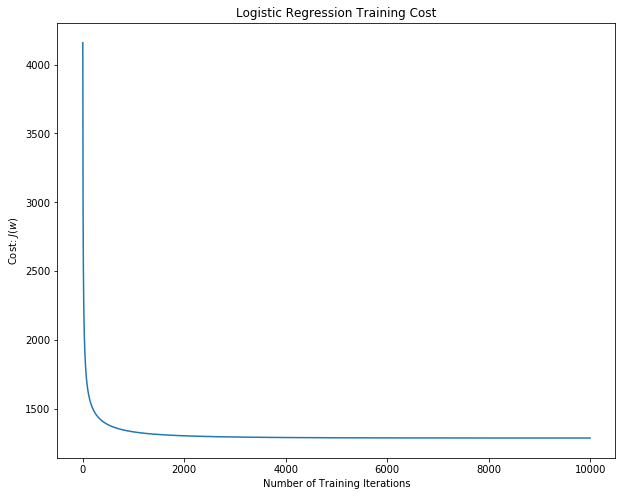

In [215]:
plt.figure(figsize=(8, 8))
plt.plot(range(len(batch_logistic.cost)), batch_logistic.cost)
plt.xlabel("Number of Training Iterations")
plt.ylabel(r"Cost: $J(w)$")
plt.title("Logistic Regression Training Cost")

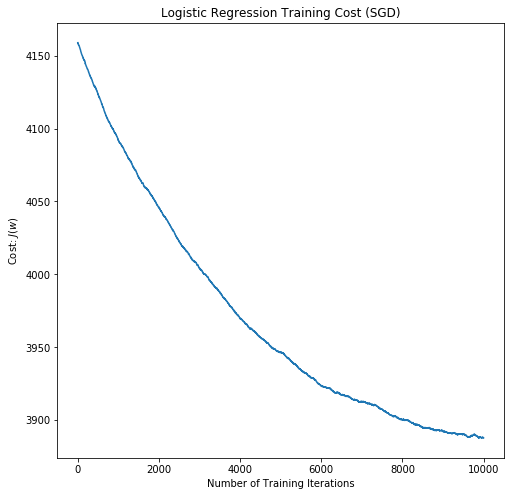

In [220]:
# Q4: Part 2

sgd_logistic = learners.LogisticRegression(lambd=0.0001, eps=1)
sgd_logistic.fit(X_white, y, iterations=10000, stochastic=True)
plt.figure(figsize=(8, 8))
plt.plot(range(len(sgd_logistic.cost)), sgd_logistic.cost)
plt.xlabel("Number of Training Iterations")
plt.ylabel(r"Cost: $J(w)$")
plt.title("Logistic Regression Training Cost (SGD)")

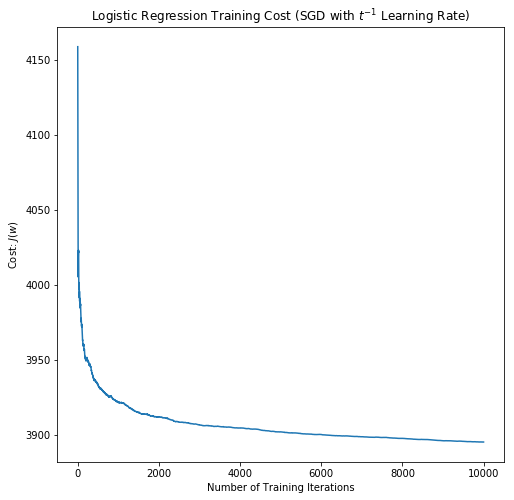

In [230]:
# Q4: Part 3

ad_sgd_logistic = learners.LogisticRegression(lambd=0.0001, eps=1000)
ad_sgd_logistic.fit(
    X_white, y, decr_learning_rate=True, iterations=10000, stochastic=True)
plt.figure(figsize=(8, 8))
plt.plot(range(len(ad_sgd_logistic.cost)), ad_sgd_logistic.cost)
plt.xlabel("Number of Training Iterations")
plt.ylabel(r"Cost: $J(w)$")
plt.title(
    r"Logistic Regression Training Cost (SGD with $t^{-1}$ Learning Rate)")

In [246]:
# Q4: Part 4

kag_logistic = learners.LogisticRegression(lambd=0.0001, eps=10000)
kag_logistic.fit(
    X_white, y, cost_interval=1000, decr_learning_rate=True, iterations=100000,
    stochastic=True, verbose=True)

Iteration 0, Cost 4158.883083359675
Iteration 1000, Cost 3869.774662896627
Iteration 2000, Cost 3847.4355472105594
Iteration 3000, Cost 3845.474694684726
Iteration 4000, Cost 3850.1382429348337
Iteration 5000, Cost 3858.32061119972
Iteration 6000, Cost 3856.9918067685576
Iteration 7000, Cost 3860.4653438511905
Iteration 8000, Cost 3859.4328235697985
Iteration 9000, Cost 3860.7252941507113
Iteration 10000, Cost 3861.080757667007
Iteration 11000, Cost 3860.1893894041286
Iteration 12000, Cost 3857.980448446438
Iteration 13000, Cost 3858.045426048616
Iteration 14000, Cost 3857.401420049005
Iteration 15000, Cost 3858.647956009326
Iteration 16000, Cost 3859.692296317347
Iteration 17000, Cost 3857.599714855637
Iteration 18000, Cost 3856.9148714896032
Iteration 19000, Cost 3856.442447756287
Iteration 20000, Cost 3856.3989805354704
Iteration 21000, Cost 3857.010170293866
Iteration 22000, Cost 3857.1110769149
Iteration 23000, Cost 3858.1715204897564
Iteration 24000, Cost 3858.8583628293295
Itera

In [252]:
pred = kag_logistic.predict(X_test_white).astype(int)
utils.write_kaggle_csv("predictions.csv", pred)

# Test Accuracy: 0.85484

In [10]:
kag_logistic_2 = learners.LogisticRegression(lambd=0.0001, eps=10)
kag_logistic_2.fit(
    X_white, y, cost_interval=100000, decr_learning_rate=True,
    iterations=1000000, verbose=True)

Iteration 0, Cost 4158.883083359675
Iteration 100000, Cost 1585.489271930521
Iteration 200000, Cost 1574.6730720135035
Iteration 300000, Cost 1568.7313001722866
Iteration 400000, Cost 1564.673832411528
Iteration 500000, Cost 1561.6122600048418
Iteration 600000, Cost 1559.1640996957422
Iteration 700000, Cost 1557.1304322258504
Iteration 800000, Cost 1555.394905452316
Iteration 900000, Cost 1553.883729625367


In [11]:
batch_pred = kag_logistic_2.predict(X_test_white).astype(int)
utils.write_kaggle_csv("batch_predictions.csv", batch_pred)

# Test Accuracy: 0.91935

In [13]:
hyp = utils.hyperparameter_grid({
    "lambd": np.random.exponential(scale=0.0001, size=20)
})
for hyperparameters in hyp:
    logistic = learners.LogisticRegression(**hyperparameters, eps=10)
    logistic.fit(X_train, y_train, iterations=10000)
    print(hyperparameters, logistic.evaluate(X_val, y_val))

{'lambd': 7.5210073822496069e-05} 0.937
{'lambd': 1.5388142865302029e-05} 0.942
{'lambd': 0.00015922352728140517} 0.936
{'lambd': 5.9568739370371732e-06} 0.944
{'lambd': 0.00016973245759792669} 0.936
{'lambd': 8.5724307694029199e-05} 0.937
{'lambd': 1.0088295449189628e-05} 0.942
{'lambd': 6.2737173537734441e-05} 0.937
{'lambd': 0.00020850827605924633} 0.937
{'lambd': 0.00016238704664593121} 0.936
{'lambd': 0.00020110063490500832} 0.937
{'lambd': 0.00024198774451900925} 0.937
{'lambd': 5.3825119684646356e-06} 0.944
{'lambd': 1.7070262756023768e-05} 0.941
{'lambd': 2.718424403625342e-05} 0.938
{'lambd': 8.6936939101649494e-05} 0.937
{'lambd': 3.3965599151600361e-05} 0.938
{'lambd': 8.1100466703128308e-06} 0.943
{'lambd': 0.00032239146481974937} 0.936
{'lambd': 0.00026822297015958378} 0.937


In [14]:
tuned_lambda = 5.3825119684646356e-06
kag_logistic_3 = learners.LogisticRegression(lambd=tuned_lambda, eps=10)
kag_logistic_3.fit(
    X_white, y, cost_interval=100000, decr_learning_rate=True,
    iterations=1000000, verbose=True)

Iteration 0, Cost 4158.883083359675
Iteration 100000, Cost 1565.4228900090664
Iteration 200000, Cost 1553.8937196686318
Iteration 300000, Cost 1547.54326743312
Iteration 400000, Cost 1543.1993935809774
Iteration 500000, Cost 1539.9176327883085
Iteration 600000, Cost 1537.2908084182209
Iteration 700000, Cost 1535.1069374416809
Iteration 800000, Cost 1533.2419211534145
Iteration 900000, Cost 1531.617000549074


In [15]:
tuned_pred = kag_logistic_3.predict(X_test_white).astype(int)
utils.write_kaggle_csv("tuned_predictions.csv", tuned_pred)

# Test Accuracy: 0.91935

In [60]:
learners_list = []
pred = []
for _ in range(10):
    ind = np.random.randint(0, num_train - 1, size=5000)
    X_set, y_set = X_white[ind], y[ind]
    learner = learners.LogisticRegression(lambd=tuned_lambda, eps=10)
    learner.fit(
        X_set, y_set, cost_interval=100000, decr_learning_rate=True,
        iterations=100000, verbose=False)
    learners_list.append(learner)
    pred.append(learner.predict(X_test_white).astype(int))
pred = np.array(pred)

In [63]:
bagged_pred = (np.sum(pred, axis=0) >= 5).astype(int)
utils.write_kaggle_csv("bagged_predictions.csv", bagged_pred)

# Test Accuracy: 0.91935

In [70]:
tuned_lambda = 5.3825119684646356e-06
kag_logistic_4 = learners.LogisticRegression(lambd=tuned_lambda, eps=100)
kag_logistic_4.fit(
    X_white, y, cost_interval=100000, decr_learning_rate=True,
    iterations=1000000,
    learning_rate_fn = lambda eps, t: eps / math.log(t + 2), verbose=True)

Iteration 0, Cost 4158.883083359675
Iteration 100000, Cost 1123.8980681763169
Iteration 200000, Cost 1123.898068175473
Iteration 300000, Cost 1123.8980681754733
Iteration 400000, Cost 1123.8980681754733
Iteration 500000, Cost 1123.8980681754733
Iteration 600000, Cost 1123.8980681754733
Iteration 700000, Cost 1123.8980681754733
Iteration 800000, Cost 1123.8980681754733
Iteration 900000, Cost 1123.8980681754733


In [71]:
log_pred = kag_logistic_4.predict(X_test_white).astype(int)
utils.write_kaggle_csv("log_predictions.csv", log_pred)

# Test Accuracy: 0.91935

In [124]:
hyp = utils.hyperparameter_grid({"lambd": [10 ** i for i in range(-10, 10)]})
for hyperparameters in hyp:
    logistic = learners.LogisticRegression(**hyperparameters, eps=0.00001)
    logistic.fit(X_train, y_train, cost_interval=100000,
        decr_learning_rate=True, iterations=100000,
        learning_rate_fn = lambda eps, t: eps / math.log(t + 2))
    print(hyperparameters, logistic.evaluate(X_val, y_val))

{'lambd': 1e-10} 0.947
{'lambd': 1e-09} 0.947
{'lambd': 1e-08} 0.947
{'lambd': 1e-07} 0.947
{'lambd': 1e-06} 0.947
{'lambd': 1e-05} 0.947
{'lambd': 0.0001} 0.947
{'lambd': 0.001} 0.947
{'lambd': 0.01} 0.947
{'lambd': 0.1} 0.947
{'lambd': 1} 0.946
{'lambd': 10} 0.944
{'lambd': 100} 0.935
{'lambd': 1000} 0.913
{'lambd': 10000} 0.907
{'lambd': 100000} 0.904


/Users/schewi/Documents/compsci-189-code/homework_4/learners.py:156: RuntimeWarning: overflow encountered in multiply
  reg_grad = 2 * self.lambd * self.w
/Users/schewi/Documents/compsci-189-code/homework_4/learners.py:169: RuntimeWarning: invalid value encountered in greater
  return scipy.special.expit(np.dot(X, self.w)) > 0.5


{'lambd': 1000000} 0.747
{'lambd': 10000000} 0.747
{'lambd': 100000000} 0.747
{'lambd': 1000000000} 0.747


In [109]:
hyp = utils.hyperparameter_grid({
    "lambd": np.random.exponential(scale=0.1, size=20)
})
for hyperparameters in hyp:
    logistic = learners.LogisticRegression(**hyperparameters, eps=100)
    logistic.fit(X_train, y_train, cost_interval=100000,
        decr_learning_rate=True, iterations=10000,
        learning_rate_fn = lambda eps, t: eps / math.log(t + 2))
    print(hyperparameters, logistic.evaluate(X_val, y_val))

{'lambd': 3.0595972189259024e-14} 0.957
{'lambd': 2.4661100506559897e-12} 0.931
{'lambd': 6.9760112060141016e-13} 0.955
{'lambd': 1.0951702110066833e-12} 0.841
{'lambd': 1.7089218321926755e-13} 0.945
{'lambd': 4.3518310943571939e-12} 0.957
{'lambd': 2.6023428040960483e-13} 0.956
{'lambd': 1.2390510156739932e-12} 0.952
{'lambd': 4.1287539935952969e-13} 0.956
{'lambd': 1.6647197480907693e-13} 0.957
{'lambd': 3.7860315197180377e-13} 0.928
{'lambd': 4.3626817981114138e-12} 0.958
{'lambd': 8.2860765143555135e-13} 0.947
{'lambd': 5.3640686917485533e-13} 0.948
{'lambd': 6.8201585589187087e-13} 0.957
{'lambd': 1.1483798757896351e-12} 0.954
{'lambd': 4.6054903457231331e-13} 0.955
{'lambd': 2.1044000787494165e-15} 0.957
{'lambd': 1.1917650040383802e-12} 0.957
{'lambd': 4.4009253309245423e-13} 0.939


In [130]:
tuned_lambda = 0.1
kag_logistic_5 = learners.LogisticRegression(lambd=tuned_lambda, eps=0.000001)
kag_logistic_5.fit(
    X_white, y, cost_interval=50000, decr_learning_rate=True,
    iterations=1000000,
    learning_rate_fn = lambda eps, t: eps / math.log(2 + t), verbose=True)

Iteration 0, Cost 4158.883083359675
Iteration 50000, Cost 1129.3170341429795
Iteration 100000, Cost 1022.5551203276553
Iteration 150000, Cost 972.511166460886
Iteration 200000, Cost 940.7587769734567
Iteration 250000, Cost 917.6754212203854
Iteration 300000, Cost 899.5380053740115
Iteration 350000, Cost 884.5637102985048
Iteration 400000, Cost 871.7815842364903
Iteration 450000, Cost 860.613679910227
Iteration 500000, Cost 850.6920770789875
Iteration 550000, Cost 841.7692220269792
Iteration 600000, Cost 833.6714866889956
Iteration 650000, Cost 826.2676858933129
Iteration 700000, Cost 819.460340428362
Iteration 750000, Cost 813.1838591775205
Iteration 800000, Cost 807.3409563027797
Iteration 850000, Cost 801.910881663207
Iteration 900000, Cost 796.8736809669161
Iteration 950000, Cost 792.0091292893868


In [131]:
fixed_pred = kag_logistic_5.predict(X_test_white).astype(int)
utils.write_kaggle_csv("fixed_predictions.csv", fixed_pred)

# Test Accuracy: 0.95968